In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
from imblearn.over_sampling import SMOTE as SMOTE_imb
from imblearn.pipeline import Pipeline as imb
from sklearn.metrics import roc_curve

In [7]:
# pip install -U imbalanced-learn

In [126]:
df = pd.read_csv('retail_warehouses.csv', index_col=0)
df.head()

,county,state,state_abbrev,size_rank,avg_home_price,area_sq_mi,unemployment_rate,unemployment_change,less_high_school,high_school,...,int_migration_rate,net_migration_rate,pop_growth,poverty_rate,median_hh_income,property_tax_rate,amazon_indicator,walmart_indicator,warehouse_target,pop_density
0,Los Angeles County,California,CA,1,560333.416667,4750.94,4.8,-7.7,21.8,20.7,...,3.456049,-5.558295,3.016829,14.9,64912,0.699057,0,1,1,2129.843568
1,San Diego County,California,CA,5,530174.833333,4525.68,4.0,-6.8,13.3,18.6,...,3.435935,-1.311985,7.158882,11.9,76048,0.699057,0,0,0,734.799632
2,Orange County,California,CA,6,670382.666667,948.07,3.5,-6.2,15.3,17.3,...,3.266434,-2.430615,5.416470,11.5,86031,0.699057,0,0,0,3354.129969
3,Riverside County,California,CA,11,341060.000000,7303.42,5.2,-8.6,18.9,26.4,...,0.807951,8.932883,9.791375,12.9,63776,0.699057,1,1,1,330.971517
4,San Bernardino County,California,CA,12,307173.166667,20104.83,4.9,-8.6,20.8,26.2,...,0.721653,1.506749,5.502104,16.0,60270,0.699057,1,1,1,107.098792


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 2362
Data columns (total 23 columns):
county                   2363 non-null object
state                    2363 non-null object
state_abbrev             2363 non-null object
size_rank                2363 non-null int64
avg_home_price           2363 non-null float64
area_sq_mi               2363 non-null float64
unemployment_rate        2363 non-null float64
unemployment_change      2363 non-null float64
less_high_school         2363 non-null float64
high_school              2363 non-null float64
college_or_associates    2363 non-null float64
bachelors                2363 non-null float64
population               2363 non-null int64
int_migration_rate       2363 non-null float64
net_migration_rate       2363 non-null float64
pop_growth               2363 non-null float64
poverty_rate             2363 non-null float64
median_hh_income         2363 non-null int64
property_tax_rate        2363 non-null float64
amazon_in

### Hypothesis Test Features
#### Null Hypothesis: There is no difference in mean between counties with Amazon and/or Walmart warehouses and those without
#### Alternative Hypothesis: There is a difference in mean...
The intuition here is that there is some internal framework that large logistics companies rely on when selection locations for their warehouses and that this preference translates to significant differences in countywide population parameters.  

In [128]:
#defining the set of features we want to run hypothesis tests on
hypothesis_cols = df.drop(['county','state','state_abbrev','amazon_indicator','walmart_indicator','warehouse_target'], axis=1)

In [12]:
# the functions below simulate the production of many samples the length of the data
# then produces replicates (statistics) for each sample (in this case, mean)

# generating a bootstrap replicate
def bootstrap_rep(data, func):
    return func(np.random.choice(data, size=len(data)))

# generating many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    '''simulate generation of a statistic many times'''
    #Initialize array of replicates
    bs_reps = []
    
    #generate replicates
    for i in range(size):
        rep = bootstrap_rep(data, func)
        bs_reps.append(rep)
    return bs_reps

In [15]:
# divide the dataset in two: one set with counties where a warehouse is present, the other warehouse is absent
present = df.loc[df['warehouse_target']==1, :]
absent = df.loc[df['warehouse_target']==0, :]

In [27]:
#list of 1000 replicates for each feature
means = []
for feature in hypothesis_cols:
    wh_present = present[feature].values
    wh_absent = absent[feature].values
    
    means_present = draw_bs_reps(wh_present, np.mean, 1000)
    means_absent = draw_bs_reps(wh_absent, np.mean, 1000)
    mean_set = (means_present, means_absent)
    means.append(mean_set)

In [32]:
#test to make sure accurate output for each feature tuple: should be 1000,1000
display(len(means[0][0]), len(means[0][1]))

1000

1000

In [148]:
for i,j in means:
    print(len(i), len(j))

1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000


IndexError: list index out of range

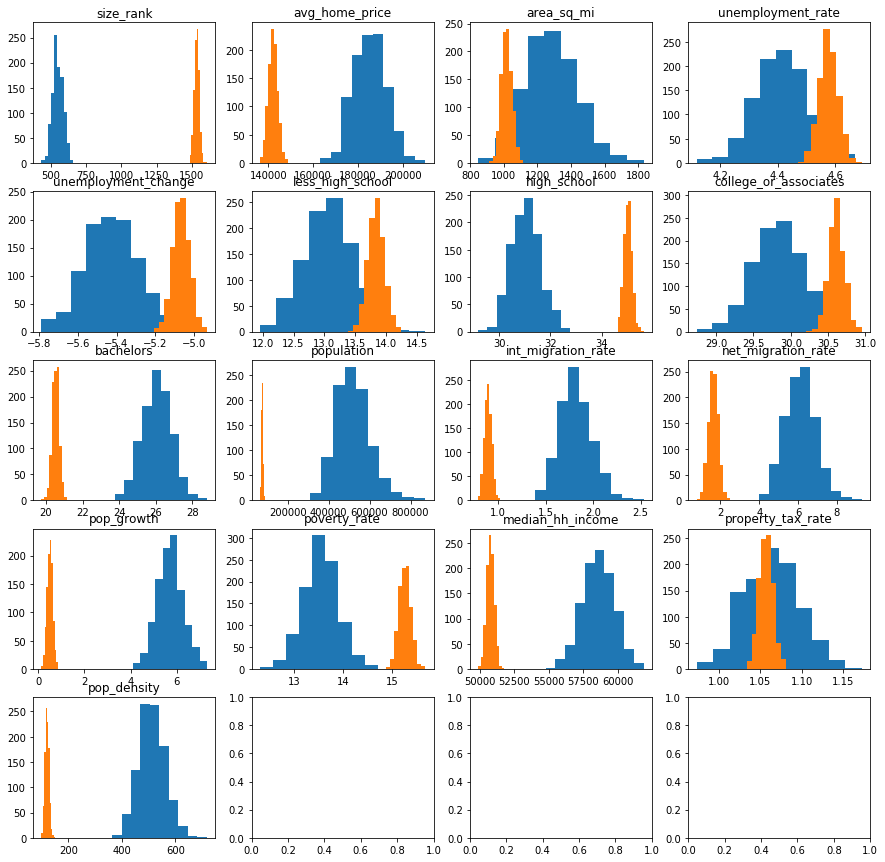

In [149]:
columns = list(hypothesis_cols.columns)
fig, axs = plt.subplots(5, 4,figsize=(15,15))

axs[0, 0].hist(means[0][0])
axs[0, 0].hist(means[0][1])
axs[0, 0].set_title(f'{columns[0]}')
axs[0, 1].hist(means[1][0])
axs[0, 1].hist(means[1][1])
axs[0, 1].set_title(f'{columns[1]}')
axs[0, 2].hist(means[2][0])
axs[0, 2].hist(means[2][1])
axs[0, 2].set_title(f'{columns[2]}')
axs[0, 3].hist(means[3][0])
axs[0, 3].hist(means[3][1])
axs[0, 3].set_title(f'{columns[3]}')
axs[1, 0].hist(means[4][0])
axs[1, 0].hist(means[4][1])
axs[1, 0].set_title(f'{columns[4]}')
axs[1, 1].hist(means[5][0])
axs[1, 1].hist(means[5][1])
axs[1, 1].set_title(f'{columns[5]}')
axs[1, 2].hist(means[6][0])
axs[1, 2].hist(means[6][1])
axs[1, 2].set_title(f'{columns[6]}')
axs[1, 3].hist(means[7][0])
axs[1, 3].hist(means[7][1])
axs[1, 3].set_title(f'{columns[7]}')
axs[2, 0].hist(means[8][0])
axs[2, 0].hist(means[8][1])
axs[2, 0].set_title(f'{columns[8]}')
axs[2, 1].hist(means[9][0])
axs[2, 1].hist(means[9][1])
axs[2, 1].set_title(f'{columns[9]}')
axs[2, 2].hist(means[10][0])
axs[2, 2].hist(means[10][1])
axs[2, 2].set_title(f'{columns[10]}')
axs[2, 3].hist(means[11][0])
axs[2, 3].hist(means[11][1])
axs[2, 3].set_title(f'{columns[11]}')
axs[3, 0].hist(means[12][0])
axs[3, 0].hist(means[12][1])
axs[3, 0].set_title(f'{columns[12]}')
axs[3, 1].hist(means[13][0])
axs[3, 1].hist(means[13][1])
axs[3, 1].set_title(f'{columns[13]}')
axs[3, 2].hist(means[14][0])
axs[3, 2].hist(means[14][1])
axs[3, 2].set_title(f'{columns[14]}')
axs[3, 3].hist(means[15][0])
axs[3, 3].hist(means[15][1])
axs[3, 3].set_title(f'{columns[15]}')
axs[4, 0].hist(means[16][0])
axs[4, 0].hist(means[16][1])
axs[4, 0].set_title(f'{columns[16]}')
axs[4, 1].hist(means[17][0])
axs[4, 1].hist(means[17][1])
axs[4, 1].set_title(f'{columns[17]}')
axs[4, 2].hist(means[18][0])
axs[4, 2].hist(means[18][1])
axs[4, 2].set_title(f'{columns[18]}')
axs[4, 3].hist(means[19][0])
axs[4, 3].hist(means[19][1])
axs[4, 3].set_title(f'{columns[19]}')
for ax in axs.flat:
    ax.set(xlabel='', ylabel='frequency')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [62]:
for index, replicates in enumerate(means):    
    # observed difference in means
    empirical_diff_means = np.mean(present[hypothesis_cols.columns[index]]) - np.mean(absent[hypothesis_cols.columns[index]])

    # Compute mean of all forces: mean_force
    feature_concat = np.concatenate([replicates[0], replicates[1]])
    mean_feature = np.mean(feature_concat)

    # Generate shifted arrays
    feat_present_shifted = replicates[0] - np.mean(replicates[0]) + mean_feature
    feat_absent_shifted = replicates[1] - np.mean(replicates[1]) + mean_feature 

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_present = draw_bs_reps(feat_present_shifted, np.mean, 10000)
    bs_replicates_absent = draw_bs_reps(feat_absent_shifted, np.mean, 10000)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = np.array(bs_replicates_present) - np.array(bs_replicates_absent)

    # Compute p-value: p
    if empirical_diff_means <= 0:
        p = np.sum(bs_replicates < empirical_diff_means) / len(bs_replicates)
    else:
        p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
    
    print(f'feature: {list(hypothesis_cols)[index]}, observed difference = {round(empirical_diff_means,3)} p-value = {p}')

feature: size_rank, observed difference = -985.01 p-value = 0.0
feature: avg_home_price, observed difference = 43500.917 p-value = 0.0
feature: area_sq_mi, observed difference = 257.427 p-value = 0.0
feature: unemployment_rate, observed difference = -0.166 p-value = 0.0
feature: unemployment_change, observed difference = -0.359 p-value = 0.0
feature: less_high_school, observed difference = -0.753 p-value = 0.0
feature: high_school, observed difference = -3.993 p-value = 0.0
feature: college_or_associates, observed difference = -0.779 p-value = 0.0
feature: bachelors, observed difference = 5.523 p-value = 0.0
feature: population, observed difference = 449104.338 p-value = 0.0
feature: int_migration_rate, observed difference = 0.933 p-value = 0.0
feature: net_migration_rate, observed difference = 4.467 p-value = 0.0
feature: pop_growth, observed difference = 5.205 p-value = 0.0
feature: poverty_rate, observed difference = -1.727 p-value = 0.0
feature: median_hh_income, observed differenc

### Create X and y variables

In [45]:
# make list of all independent variables to test
col_names = list(hypothesis_cols)

In [46]:
# Note: make sure the dataframe name is df or update the function
def x_var_combos(k):
    '''Takes dataframe columns and returns n choose k
    combinations where k is number of independent variables'''

    n = list(range(len(col_names)))

    index_combos = list(combinations(n,k))
    
    #take index combos and generate labeled combos
    X_list = []

    for index in index_combos:
        combos = [col_names[val] for val in index]    
        X_list.append(combos)

    return X_list

In [115]:
independents = x_var_combos(15)
independents

[['size_rank',
  'avg_home_price',
  'area_sq_mi',
  'unemployment_rate',
  'unemployment_change',
  'less_high_school',
  'high_school',
  'college_or_associates',
  'bachelors',
  'population',
  'int_migration_rate',
  'net_migration_rate',
  'pop_growth',
  'poverty_rate',
  'median_hh_income'],
 ['size_rank',
  'avg_home_price',
  'area_sq_mi',
  'unemployment_rate',
  'unemployment_change',
  'less_high_school',
  'high_school',
  'college_or_associates',
  'bachelors',
  'population',
  'int_migration_rate',
  'net_migration_rate',
  'pop_growth',
  'poverty_rate',
  'property_tax_rate'],
 ['size_rank',
  'avg_home_price',
  'area_sq_mi',
  'unemployment_rate',
  'unemployment_change',
  'less_high_school',
  'high_school',
  'college_or_associates',
  'bachelors',
  'population',
  'int_migration_rate',
  'net_migration_rate',
  'pop_growth',
  'poverty_rate',
  'pop_density'],
 ['size_rank',
  'avg_home_price',
  'area_sq_mi',
  'unemployment_rate',
  'unemployment_change',
  

In [48]:
# X variable
for independent in independents:
    X = df[independent]
    print(X.shape)

(2363, 17)


In [49]:
# Y variable
y = df.warehouse_target

### Logistic Regression Model

In [50]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [135]:
# df = pd.read_csv('data/retail_warehouses.csv')
# df = df.select_dtypes(include=['int','float'])
# df.drop(['Unnamed: 0','latitude','longitude'],axis=1,inplace=True)
# X= df.drop('warehouse_target',axis=1)
# y = df.warehouse_target
# SPLITTING DATA INTO TRAIN/TEST
from sklearn.model_selection import train_test_split 
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(df[independent], y, test_size = 0.3, random_state = 0, stratify=y) 
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 
# TRAIN WITHOUT DEALING WITH IMBALANCE
# logistic regression object 
lr = LogisticRegression() 
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
predictions = lr.predict(X_test) 
# print classification report 
print(classification_report(y_test, predictions)) 
# USE SMOTE NOW
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
# print classification report 
print(classification_report(y_test, predictions)) 

Number transactions X_train dataset:  (1654, 17)
Number transactions y_train dataset:  (1654,)
Number transactions X_test dataset:  (709, 17)
Number transactions y_test dataset:  (709,)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       658
           1       0.62      0.10      0.17        51

    accuracy                           0.93       709
   macro avg       0.78      0.55      0.57       709
weighted avg       0.91      0.93      0.91       709

Before OverSampling, counts of label '1': 118
Before OverSampling, counts of label '0': 1536 

After OverSampling, the shape of train_X: (3072, 17)
After OverSampling, the shape of train_y: (3072,) 

After OverSampling, counts of label '1': 1536
After OverSampling, counts of label '0': 1536
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       658
           1       0.19      0.71      0.30        51

    accuracy                   

C:\Users\achil\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [140]:
df['Log_pred'] = lr1.predict(X)
df['Log_probabilities'] = lr1.predict_proba(X)[:,1]

In [161]:
# Top 50 predicted false positives
fp = df.sort_values('Log_probabilities',ascending=False).loc[(df.warehouse_target == 0) & (df.Log_pred == 1)].head(50)
fp.head()

,county,state,state_abbrev,size_rank,avg_home_price,area_sq_mi,unemployment_rate,unemployment_change,less_high_school,high_school,...,poverty_rate,median_hh_income,property_tax_rate,amazon_indicator,walmart_indicator,warehouse_target,pop_density,Log_pred,Log_ pro,Log_probabilities
1,San Diego County,California,CA,5,530174.833333,4525.68,4.0,-6.8,13.3,18.6,...,11.9,76048,0.699057,0,0,0,734.799632,1,0.990700,0.990700
486,Oakland County,Michigan,MI,32,223026.000000,907.29,3.5,-8.3,6.3,19.2,...,7.8,77558,1.368569,0,0,0,1384.542980,1,0.967730,0.967730
367,Broward County,Florida,FL,18,238740.333333,1322.86,4.0,-6.2,11.4,27.2,...,13.1,56702,0.885964,0,0,0,1462.339930,1,0.964002,0.964002
154,Collin County,Texas,TX,74,318400.833333,886.10,3.5,-3.7,6.4,15.1,...,5.9,95394,1.615935,0,0,0,1096.256630,1,0.962542,0.962542
157,Fort Bend County,Texas,TX,107,256508.416667,885.34,4.6,-3.0,10.3,17.2,...,8.0,91661,1.615935,0,0,0,865.357942,1,0.962509,0.962509


In [158]:
#list of 1000 replicates for each feature
post_means = []
for feature in hypothesis_cols:
    wh_present = present[feature].values
    fp_absent = fp[feature].values
    
    means_present = draw_bs_reps(wh_present, np.mean, 1000)
    means_absent = draw_bs_reps(fp_absent, np.mean, 1000)
    mean_set = (means_present, means_absent)
    post_means.append(mean_set)

IndexError: list index out of range

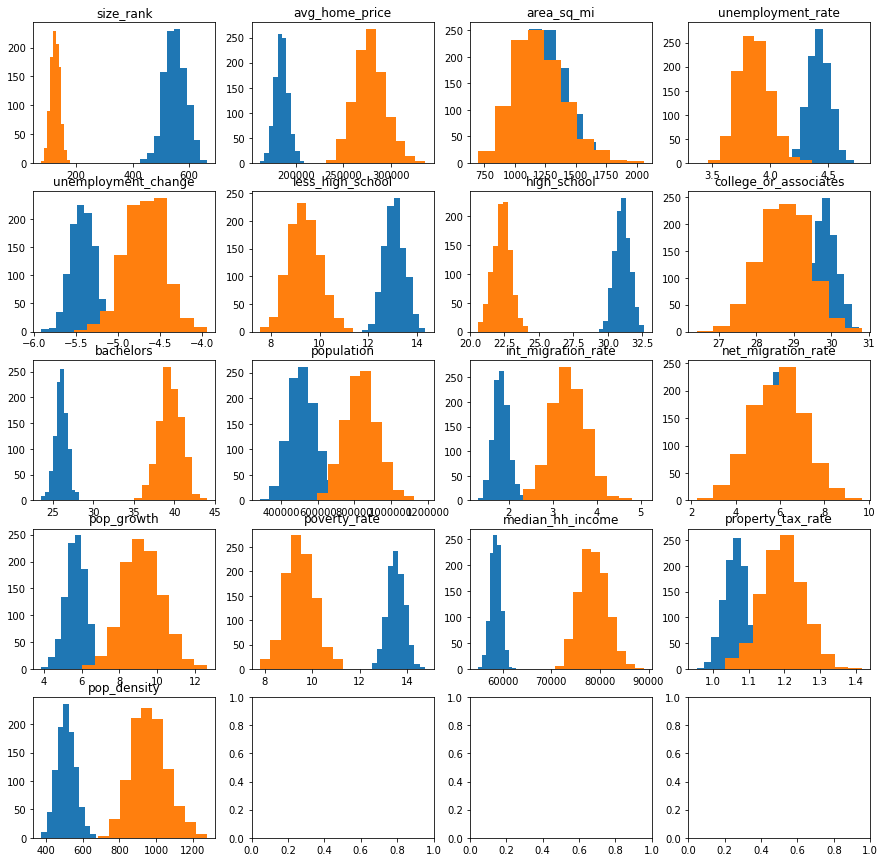

In [159]:
columns = list(hypothesis_cols.columns)
fig, axs = plt.subplots(5, 4,figsize=(15,15))

axs[0, 0].hist(post_means[0][0])
axs[0, 0].hist(post_means[0][1])
axs[0, 0].set_title(f'{columns[0]}')
axs[0, 1].hist(post_means[1][0])
axs[0, 1].hist(post_means[1][1])
axs[0, 1].set_title(f'{columns[1]}')
axs[0, 2].hist(post_means[2][0])
axs[0, 2].hist(post_means[2][1])
axs[0, 2].set_title(f'{columns[2]}')
axs[0, 3].hist(post_means[3][0])
axs[0, 3].hist(post_means[3][1])
axs[0, 3].set_title(f'{columns[3]}')
axs[1, 0].hist(post_means[4][0])
axs[1, 0].hist(post_means[4][1])
axs[1, 0].set_title(f'{columns[4]}')
axs[1, 1].hist(post_means[5][0])
axs[1, 1].hist(post_means[5][1])
axs[1, 1].set_title(f'{columns[5]}')
axs[1, 2].hist(post_means[6][0])
axs[1, 2].hist(post_means[6][1])
axs[1, 2].set_title(f'{columns[6]}')
axs[1, 3].hist(post_means[7][0])
axs[1, 3].hist(post_means[7][1])
axs[1, 3].set_title(f'{columns[7]}')
axs[2, 0].hist(post_means[8][0])
axs[2, 0].hist(post_means[8][1])
axs[2, 0].set_title(f'{columns[8]}')
axs[2, 1].hist(post_means[9][0])
axs[2, 1].hist(post_means[9][1])
axs[2, 1].set_title(f'{columns[9]}')
axs[2, 2].hist(post_means[10][0])
axs[2, 2].hist(post_means[10][1])
axs[2, 2].set_title(f'{columns[10]}')
axs[2, 3].hist(post_means[11][0])
axs[2, 3].hist(post_means[11][1])
axs[2, 3].set_title(f'{columns[11]}')
axs[3, 0].hist(post_means[12][0])
axs[3, 0].hist(post_means[12][1])
axs[3, 0].set_title(f'{columns[12]}')
axs[3, 1].hist(post_means[13][0])
axs[3, 1].hist(post_means[13][1])
axs[3, 1].set_title(f'{columns[13]}')
axs[3, 2].hist(post_means[14][0])
axs[3, 2].hist(post_means[14][1])
axs[3, 2].set_title(f'{columns[14]}')
axs[3, 3].hist(post_means[15][0])
axs[3, 3].hist(post_means[15][1])
axs[3, 3].set_title(f'{columns[15]}')
axs[4, 0].hist(post_means[16][0])
axs[4, 0].hist(post_means[16][1])
axs[4, 0].set_title(f'{columns[16]}')
axs[4, 1].hist(post_means[17][0])
axs[4, 1].hist(post_means[17][1])
axs[4, 1].set_title(f'{columns[17]}')
axs[4, 2].hist(post_means[18][0])
axs[4, 2].hist(post_means[18][1])
axs[4, 2].set_title(f'{columns[18]}')
axs[4, 3].hist(post_means[19][0])
axs[4, 3].hist(post_means[19][1])
axs[4, 3].set_title(f'{columns[19]}')
for ax in axs.flat:
    ax.set(xlabel='', ylabel='frequency')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [136]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, lr1.predict(X_train)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
conf_matrix

,predicted 0,predicted 1
actual 0,1153,383
actual 1,27,91


In [131]:
X= hypothesis_cols
y = df.warehouse_target

#Set up hyperparameter grid
c_range = [1]
param_grid = {'lr__C': c_range, 'lr__penalty': ['l1','l2']}

# Set up pipeline
steps = [('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=1000))]

pipeline = Pipeline(steps)

# Instantiate GridSearchCV
pipeline_cv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=25)

# Fit the pipeline to the training data
pipeline_cv.fit(X_train, y_train)

# Print optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(pipeline_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(pipeline_cv.best_score_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Tuned Logistic Regression Parameter: {'lr__C': 1, 'lr__penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9333333333333333


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


In [124]:
hypothesis_cols

,size_rank,avg_home_price,area_sq_mi,unemployment_rate,unemployment_change,less_high_school,high_school,college_or_associates,bachelors,population,int_migration_rate,net_migration_rate,pop_growth,poverty_rate,median_hh_income,property_tax_rate,pop_density
0,1,560333.416667,4750.94,4.8,-7.7,21.8,20.7,26.2,31.2,10118759,3.456049,-5.558295,3.016829,14.9,64912,0.699057,2129.843568
1,5,530174.833333,4525.68,4.0,-6.8,13.3,18.6,30.7,37.4,3325468,3.435935,-1.311985,7.158882,11.9,76048,0.699057,734.799632
2,6,670382.666667,948.07,3.5,-6.2,15.3,17.3,28.3,39.1,3179950,3.266434,-2.430615,5.416470,11.5,86031,0.699057,3354.129969
3,11,341060.000000,7303.42,5.2,-8.6,18.9,26.4,33.2,21.5,2417224,0.807951,8.932883,9.791375,12.9,63776,0.699057,330.971517
4,12,307173.166667,20104.83,4.9,-8.6,20.8,26.2,33.2,19.8,2153203,0.721653,1.506749,5.502104,16.0,60270,0.699057,107.098792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,2521,237732.166667,4174.60,4.2,-2.6,4.6,33.4,35.2,26.8,8442,0.000000,-2.127408,-1.722934,9.5,55412,0.575889,2.022230
2359,2525,164219.083333,2242.70,4.0,-1.9,11.5,29.0,38.6,21.0,8035,-0.617170,-16.046411,-5.803048,10.7,57989,0.575889,3.582735
2360,2613,166224.750000,2400.02,4.0,-0.8,8.1,34.4,37.7,19.8,6986,4.225650,-34.227763,-2.958744,10.6,56214,0.575889,2.910809
2361,2621,242739.583333,2865.30,3.5,-1.5,7.4,30.6,41.2,20.7,7424,2.947679,-17.284116,4.255020,7.7,61664,0.575889,2.591003


In [132]:
y_train_predict = pipeline_cv.predict(X_train)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
pd.DataFrame(confusion_matrix(y_train, y_train_predict), 
             columns = ['predicted 0', 'predicted 1'], 
             index = ['actual 0', 'actual 1'])

,predicted 0,predicted 1
actual 0,1749,6
actual 1,117,18


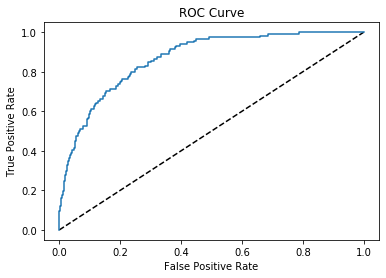

In [72]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = pipeline_cv.predict_proba(X_train)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [116]:
thresholds

array([1.99975191e+00, 9.99751910e-01, 7.72225707e-01, 7.66999833e-01,
       6.49949497e-01, 6.47795966e-01, 5.55360483e-01, 5.17661504e-01,
       5.12864272e-01, 4.99478119e-01, 4.98056236e-01, 4.97812229e-01,
       4.94912893e-01, 4.57410607e-01, 4.45729504e-01, 4.26275538e-01,
       4.19796192e-01, 4.00153802e-01, 3.95728673e-01, 3.75353344e-01,
       3.75068787e-01, 3.74483425e-01, 3.73412891e-01, 3.67215220e-01,
       3.58603231e-01, 3.56932075e-01, 3.41448534e-01, 3.33286822e-01,
       3.32712504e-01, 3.29347193e-01, 3.28708077e-01, 3.24328854e-01,
       3.19359985e-01, 3.10426944e-01, 3.08788668e-01, 3.06765614e-01,
       3.03128766e-01, 3.00293750e-01, 2.93053205e-01, 2.89980146e-01,
       2.86720793e-01, 2.83982052e-01, 2.81956661e-01, 2.77823176e-01,
       2.77635915e-01, 2.77002675e-01, 2.76343550e-01, 2.72995688e-01,
       2.72295813e-01, 2.67235642e-01, 2.66137687e-01, 2.63929674e-01,
       2.62027947e-01, 2.53852156e-01, 2.52494253e-01, 2.43670632e-01,
      

### SMOTE Model

In [108]:
sm = SMOTE_imb(random_state = 25) 
sm_X_train, sm_y_train = sm.fit_sample(X_train, y_train.ravel()) 

In [109]:
print('After OverSampling, the shape of train_X: {}'.format(sm_X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(sm_y_train.shape)) 
print("After OverSampling, counts of label '1': {}".format(sum(sm_y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(sm_y_train == 0))) 

After OverSampling, the shape of train_X: (3072, 17)
After OverSampling, the shape of train_y: (3072,) 

After OverSampling, counts of label '1': 1536
After OverSampling, counts of label '0': 1536


In [110]:
y_train_predict = pipeline_cv.predict(sm_X_train)
y_train_predict

pd.DataFrame(confusion_matrix(sm_y_train, y_train_predict), 
             columns = ['predicted 0', 'predicted 1'], 
             index = ['actual 0', 'actual 1'])

,predicted 0,predicted 1
actual 0,1531,5
actual 1,1355,181


In [111]:
sum(sm_y_train == 1)

1536